# Chapter. 13 통계학
1) 기술 통계량   
2) 랜덤 수   
3) 확률 변수   
4) 분포 및 가설 검정 계산  
5) 비매개변수 기법

### 모듈 임포트하기

In [3]:
# scipy의 통계 모듈인 stats 활용
from scipy import stats 
from scipy import optimize
import numpy as np
import random

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

## 통계 및 확률 리뷰
#### - 기술 통계량을 계산해 전체 모집단의 속성을 오차 위험을 통제하면서 체계적으로 추론 가능

In [4]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [5]:
np.mean(x) # 평균값

3.1

In [6]:
np.median(x) # 중간값

3.0

In [7]:
x.min(), x.max() # 최댓값/ 최솟값

(0.9, 6.7)

In [8]:
x.var() # 분산(데이터셋이 전체 모집단이라고 가정: 자유도=N)

3.0700000000000007

In [9]:
x.std() # 표준편차(데이터셋이 전체 모집단이라고 가정: 자유도=N)

1.7521415467935233

In [10]:
x.var(ddof=1) # 델타 자유도만큼 차감한 수(불편 추정값)

3.5085714285714293

In [11]:
x.std(ddof=1) # 델타 자유도만큼 차감한 수(불편 추정값)

1.8731181032095732

## 랜덤 수

In [12]:
np.random.rand() # 균일 분포된 부동소수점 수치를 생성 (0.0은 포함/ 1.0은 미포함)

0.4726737823471263

In [13]:
np.random.randn() # randn: 표준 정규분포(평균 0과 표준편차 1의 정규분포)를 따르는 랜덤 수 생성

0.4081265231493935

In [14]:
np.random.rand(5) # 길이가 5인 랜덤 벡터 생성

array([0.48093326, 0.30636536, 0.83705122, 0.48144922, 0.70544181])

In [15]:
np.random.randn(2, 4) # 2 X 4인 랜덤 배열 생성

array([[-2.40201665,  2.75779893, -0.14141682,  0.15431737],
       [ 0.87399869,  0.07818914, -0.01607127,  0.31647944]])

In [16]:
np.random.randint(10, size=10) # randint: 주어진 최저(포함)와 최대(미포함) 사이에서 균등 분포하는 정수를 생성

array([6, 6, 0, 0, 6, 5, 3, 6, 7, 4])

In [17]:
np.random.randint(low=10, high=20, size=(2, 10)) # 상한과 하한을 지정해야하며(하한은 묵시적으로 0), size로 배열의 모양을 지정

array([[17, 13, 12, 12, 14, 18, 11, 13, 13, 18],
       [10, 17, 17, 12, 13, 11, 13, 10, 16, 17]])

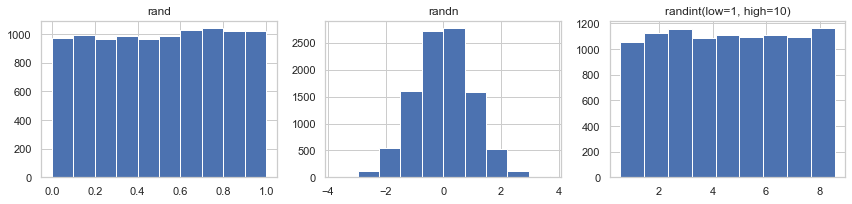

In [18]:
# 각각의 랜덤 수의 분포
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn") # 0을 중심으로 가우스 곡선과 유사
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

fig.tight_layout()
fig.savefig("ch13-random-hist.pdf")

In [19]:
#random.sample(range(10), 5)

In [20]:
np.random.choice(10, 5, replace=False) # choice: 중복없이 랜덤추출/ 0~10범위에서 5개 추출/ replace=(False: 중복없음/True:중복잆음)

array([0, 3, 9, 5, 4])

In [21]:
np.random.seed(123456789) # seed: 랜덤 수 발생기를 특정 상태로 초기화하는 숫자(시딩하면 항상 동일한 랜덤 수 생성)

In [22]:
np.random.rand()

0.532833024789759

In [23]:
np.random.seed(123456789); np.random.rand() # 동일한 랜덤 수 발생

0.532833024789759

In [24]:
prng = np.random.RandomState(123456789) # RandomState: 선택적으로 초기화를 위한 시드 인수를 정수로 취함

In [25]:
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [26]:
prng.chisquare(1, size=(2, 2)) # RandomState의 메서드 - chisquare: X2(제곱) 분포

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [27]:
prng.standard_t(1, size=(2, 3)) # RandomState의 메서드 - standard_t: 스튜던트 t 분포

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [28]:
prng.f(5, 2, size=(2, 4)) # RandomState의 메서드 - f: F 분포

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [29]:
prng.binomial(10, 0.5, size=10) # 이산 이항 분포

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [30]:
prng.poisson(5, size=10) # 푸아송 분포

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

# 확률 변수 및 분포
#### - 확률변수의 각 관측은 랜덤 수를 생성하며, 관측된 값의 분포는 확률 분포로 기술
#### - 확률 분포는 이산형(정수)과 연속형(실수) 두가지 유형이 있음

In [31]:
np.random.seed(123456789)

In [32]:
X = stats.norm(1, 0.5) # 평균 1, 표준편차 0.5인 정규분포 확률변수 생성

In [33]:
X.mean() # 평균

1.0

In [42]:
X.median() # 중앙값

1.0

In [34]:
X.var() # 분산

0.25

In [35]:
X.std() # 표준편차

0.5

In [36]:
[X.moment(n) for n in range(5)] # N차 비중심

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [37]:
X.stats() # 분포의 통계량(정규분포 확률변수의 평균과 분산)

(array(1.), array(0.25))

In [38]:
X.pdf([0, 1, 2]) # 확률 분포 함수(연속) or 확률 질량 함수(이산)

array([0.10798193, 0.79788456, 0.10798193])

In [39]:
X.cdf([0, 1, 2]) # 누적 분포 함수

array([0.02275013, 0.5       , 0.97724987])

In [40]:
X.rvs(10) # 확률 변수 표본

array([2.106451  , 2.0641989 , 1.9208557 , 1.04119124, 1.42948184,
       0.58699179, 1.57863526, 1.68795757, 1.47151423, 1.4239353 ])

In [41]:
stats.norm(1, 0.5).stats()

(array(1.), array(0.25))

In [42]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [43]:
X.interval(0.95) # x의 하한값과 상한값 계산하는데 유용(신뢰구간 95%)

(0.020018007729972975, 1.979981992270027)

In [44]:
X.interval(0.99) # (신뢰구간 99%)

(-0.2879146517744502, 2.28791465177445)

In [45]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999) # 신뢰구간 99.9%
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95) # 신뢰구간 95%
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF") # PDF:확률분포함수
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF") # PMF:확률질량함수
    axes[1].plot(x999, X.cdf(x999), label="CDF") # CDF:누적분포함수
    axes[1].plot(x999, X.sf(x999), label="SF") # SF:생존함수
    axes[2].plot(x999, X.ppf(x999), label="PPF") # PPF:퍼센트-포인트 함수
    
    for ax in axes:
        ax.legend()
    
    return axes

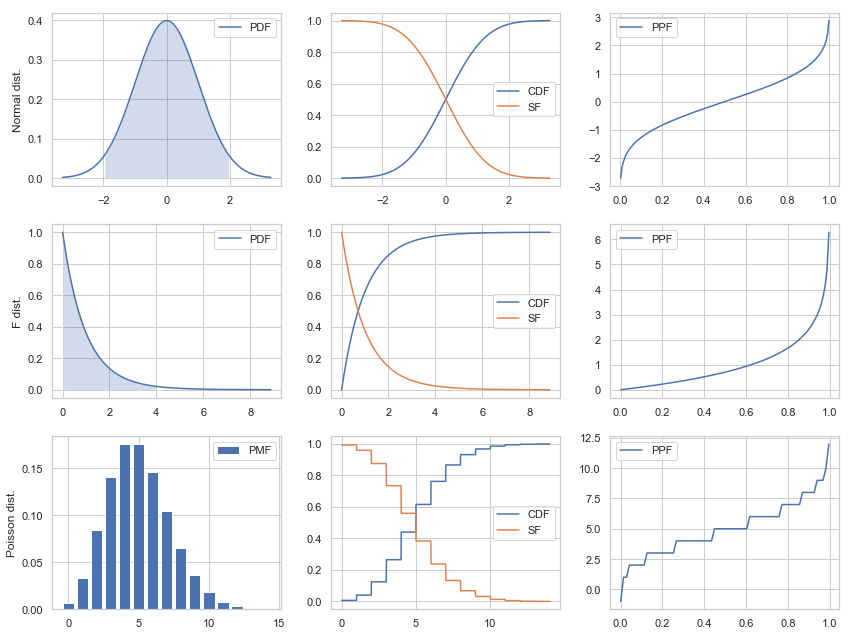

In [55]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.") # 정규분포
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.") # F 분포
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.") # 푸아송 분포

fig.tight_layout()
fig.savefig("ch13-distributions.pdf")

In [56]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [57]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [60]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([ 0.9914392 ,  0.72642635,  0.87071034, -0.2786678 ,  1.15299643,
        0.85446135,  1.43636451,  0.59772377,  0.33669092,  0.13546412])

In [65]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    # 라이브러리 업데이트로 normed속성을 density로 바꾸고 stacked 속성 추가
    ax.hist(X_samples, label="samples", density=True, bins=75, stacked=True) 
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

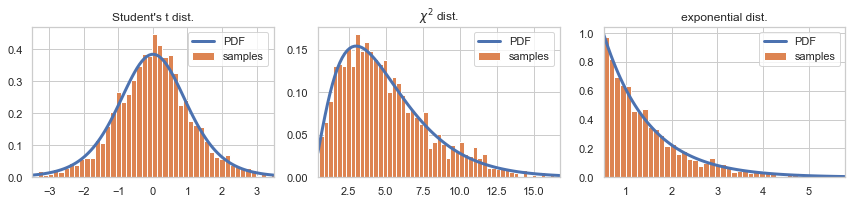

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0) # t 분포
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0) # 카이제곱 분포
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5) # 지수 분포
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
fig.savefig("ch13-dist-sample.pdf")

#### fit 메서드를 사용한 재적합화

In [74]:
X = stats.chi2(df=5) # 자유도(df)가 5인 X2(제곱) 분포

In [75]:
X_samples = X.rvs(500) # 500개의 랜덤 표본 추출

In [76]:
df, loc, scale = stats.chi2.fit(X_samples) # fit: 주어진 데이터로 분포의 최대 우도 매개변수를 반환

In [77]:
df, loc, scale

(5.029125822314947, 0.07229920334033671, 0.9748536936612461)

In [78]:
Y = stats.chi2(df=df, loc=loc, scale=scale) # 새로운 확률 변수 인스턴스 Y 생성

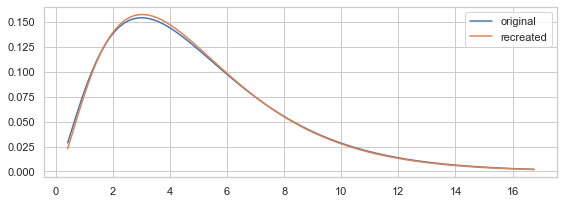

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

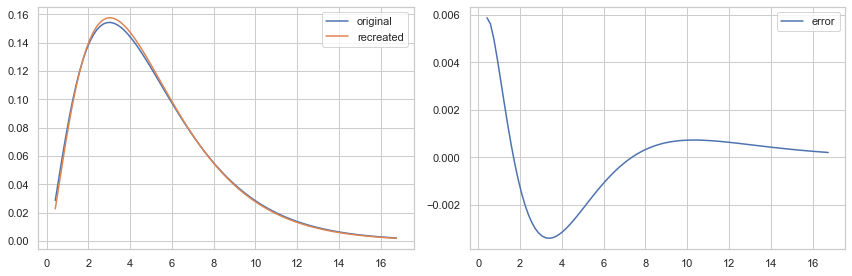

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

fig.tight_layout()
fig.savefig("ch13-max-likelihood-fit.pdf")

# 가설 검정
#### - 가설 검정은 가설(주장)의 타당성 여부를 데이터에 기초해 평가히는 체계적인 방법론이자 통계학의 중요한 응용
#### - 귀무 가설과 대립 가설은 반드시 상호 배타적이고 상호 보완적이어야 하므로 두 가설 중 하나만이 진실
1. 귀무가설과 대립가서 유형화 
2. 귀무가설이 속한 표본 분포에 따라 검정 통계량 선택 
3. 자료 수집 
4. 검정 통계량 계산 및 p-value 계산 
5. p-value < a 경우 귀무가설 기각/ p-value > a 경우 귀무가설 기각 X

In [167]:
np.random.seed(123456789)

In [168]:
mu0, mu, sigma = 1.0, 0.8, 0.5 # mu0:표본집단의 평균 1/ mu: 모집단의 평균 0.8/ sigma: 모집단의 표준편차 0.5

In [169]:
X = stats.norm(mu, sigma)

In [170]:
n = 100 # 표본집단 100개
X_samples = X.rvs(n)

In [171]:
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n)) # X_samples의 검정 통계량 계산
z

1.1661020449901693

In [172]:
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n)) # 모집단의 표준편차를 모를경우(std의 인수를 ddof=l로 표본 표준편치 계산)
t

1.221296744750716

In [173]:
stats.norm().ppf(0.025) # stats.norm: 정규분포 획률 변수 나타냄 / ppf: 5% 유의 수준에 해당하는 통계량 값 조회 
                        # p-value값이 -1.96보다 작으므로 이 경우는 귀무 가설 기각

-1.9599639845400545

In [174]:
2 * stats.norm().cdf(-abs(z)) # cdf: 관측 검정 통계량의 p-value 값을 명시적으로 계산
                              # p-value값이  더 작으므로 귀무가설 기각을 뒷받침

0.24357318995559918

In [175]:
2 * stats.t(df=(n-1)).cdf(-abs(t)) # stats.norm() 대신 t 분포 사용 (자유도(df)는 n-1)

0.22487414518804483

In [176]:
t, p = stats.ttest_1samp(X_samples, mu) # 내장함수 사용

In [177]:
t # t 검정 통계량

1.221296744750716

In [178]:
p # p-value값

0.22487414518804483

C:\Users\82102\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


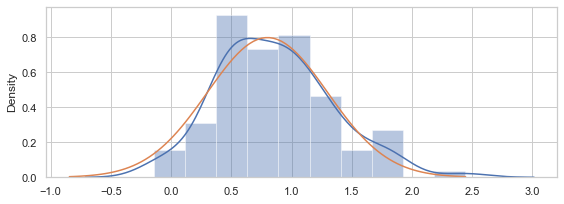

In [179]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

In [192]:
n, sigma = 50, 1.0 # 표본 50개

In [193]:
mu1, mu2 = np.random.rand(2) # 두개의 표본이 모집단 평균과 같지 않다(귀무가설)을 기각하기 위한 평가

In [194]:
mu1, mu2

(0.22732737351563237, 0.6712277414269906)

In [195]:
X1 = stats.norm(mu1, sigma)

In [196]:
X1_sample = X1.rvs(n)

In [197]:
X2 = stats.norm(mu2, sigma)

In [198]:
X2_sample = X2.rvs(n)

In [199]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [200]:
t

-2.148861955770067

In [201]:
p # p-value값이 0.05보다 작으므로 귀무가설 기각

0.03410868543125364

In [202]:
mu1, mu2

(0.22732737351563237, 0.6712277414269906)

C:\Users\82102\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82102\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

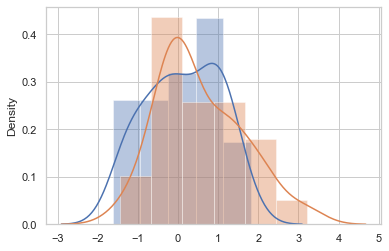

In [203]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

# 비매개변수 기법

In [93]:
np.random.seed(0)

In [94]:
X = stats.chi2(df=5)

In [95]:
X_samples = X.rvs(100)

In [96]:
kde = stats.kde.gaussian_kde(X_samples)

In [97]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [98]:
x = np.linspace(0, 20, 100)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


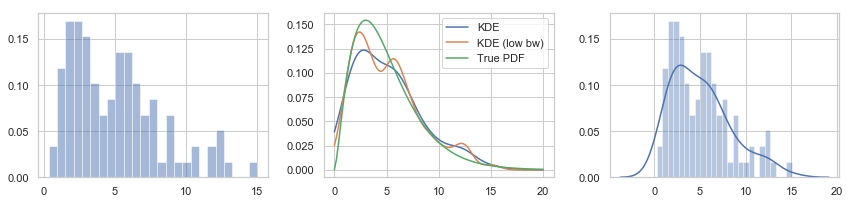

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
fig.savefig("ch13-hist-kde.pdf")

In [100]:
kde.resample(10)

array([[ 1.10979087,  0.4379679 , 14.20879078,  5.94683846,  1.78490438,
         5.58416739,  4.18349885,  2.78527976,  0.68112826,  7.7643985 ]])

In [101]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

In [102]:
kde_cdf = np.vectorize(_kde_cdf)

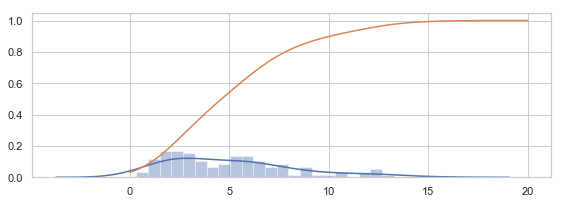

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [104]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]

In [105]:
kde_ppf = np.vectorize(_kde_ppf)

In [106]:
kde_ppf([0.05, 0.95])

array([ 0.39074674, 11.94993578])

In [107]:
X.ppf([0.05, 0.95])

array([ 1.14547623, 11.07049769])